# Disease Classification Project: Predicting Disease Code

## Step 1: Load and Explore the Dataset

In [1]:

import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\User\Downloads\Diseases_Symptoms.csv")

In [2]:
# Display dataset structure and first few rows
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          405 non-null    object
 1   Symptoms      405 non-null    object
 2   Treatments    404 non-null    object
 3   Disease_Code  405 non-null    object
 4   Contagious    405 non-null    bool  
 5   Chronic       405 non-null    bool  
dtypes: bool(2), object(4)
memory usage: 13.6+ KB


,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",NaN,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True


In [3]:
# Dataset shape
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 405 rows and 6 columns.


## Step 2: Exploratory Data Analysis (EDA)

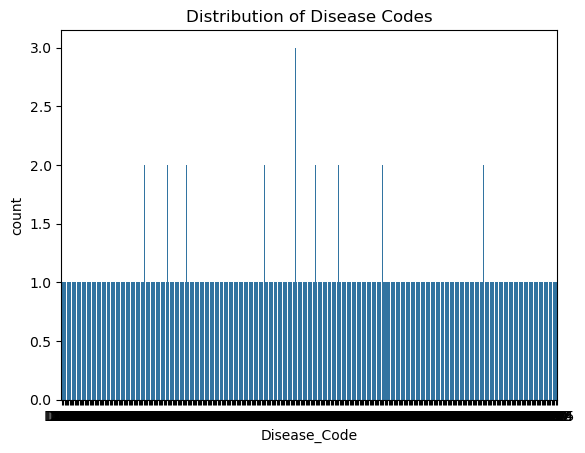

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze target variable distribution
sns.countplot(x=data['Disease_Code'])
plt.title('Distribution of Disease Codes')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15220\1768760544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


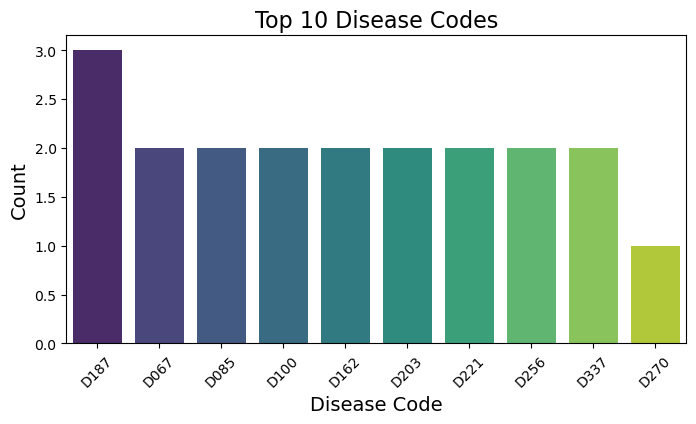

In [6]:
# Filter the dataset to include only the top 10 Disease_Code values
top_disease_codes = data['Disease_Code'].value_counts().nlargest(10).index
top_10_data = data[data['Disease_Code'].isin(top_disease_codes)]

# Visualize the distribution of the top 10 Disease_Code values
plt.figure(figsize=(8, 4))
sns.countplot(
    x=top_10_data['Disease_Code'],
    order=top_10_data['Disease_Code'].value_counts().index,
    palette="viridis",
)
plt.title('Top 10 Disease Codes', fontsize=16)
plt.xlabel('Disease Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Treatments    1
dtype: int64


## Step 3: Data Cleaning and Preprocessing

In [10]:
from sklearn.model_selection import train_test_split

# Fill missing values in 'Treatments' with 'Unknown'
data['Treatments'] = data['Treatments'].fillna('Unknown')

In [11]:
# Split data into features and target
X = data['Symptoms']  # Feature: Symptoms
y = data['Disease_Code']  # Target: Disease_Code

In [13]:
# Filter out classes with only 1 sample
filtered_data = data[data['Disease_Code'].map(data['Disease_Code'].value_counts()) > 1]

In [22]:
#define X and y
X = filtered_data['Symptoms']  # Assuming "Symptoms" is the column for features
y = filtered_data['Disease_Code']

In [23]:
# Verifying the distribution of the target variable
new_target_distribution = y.value_counts()

## Step 4: Feature Engineering (TF-IDF)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=9, random_state=42, stratify=y
)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert symptoms into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Step 5: Model Building

In [28]:
# Verify shapes
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train_tfidf: (10, 60)
Shape of y_train: (10,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predictions and evaluation
y_pred = rf_model.predict(X_test_tfidf)

In [31]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.78
Confusion Matrix:
 [[0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

        D067       0.00      0.00      0.00         1
        D085       1.00      1.00      1.00         1
        D100       1.00      1.00      1.00         1
        D162       0.00      0.00      0.00         1
        D187       0.50      1.00      0.67         1
        D203       1.00      1.00      1.00         1
        D221       1.00      1.00      1.00         1
        D256       0.50      1.00      0.67         1
        D337       1.00      1.00      1.00         1

    accuracy                           0.78         9
   macro avg       0.67      0.78      0.70         9
weighted avg       0.67      0.78      0.70         9

